In [1]:
import os
import laspy as lp
import numpy as np
import pylas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, MultiPolygon
from scipy.spatial import ConvexHull

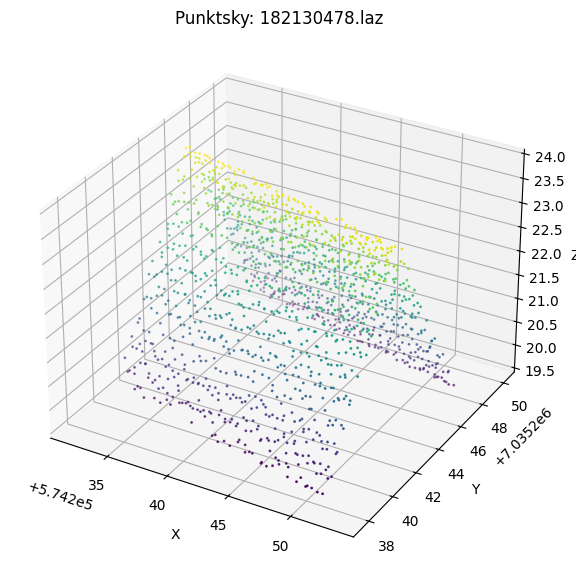

file_name  point_count  \
0  182130478.laz         1431   

                                                   x  \
0  [574233.04, 574233.29, 574233.55, 574232.86, 5...   

                                                   y  \
0  [7035248.890000001, 7035249.4, 7035249.91, 703...   

                                                   z  min_z  
0  [21.0, 20.57, 20.080000000000002, 22.61, 22.12...  19.71

In [17]:
#Leser filer fra eksempelmappen og plotter punktskyene


folder = "sample_roofdata_50"

# Opprett en tom dictionary for å lagre informasjonen
roofs_dict = {}
roofs_data = []

df = gpd.GeoDataFrame()
# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og hent informasjon
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            point_count = fh.header.point_count
          
            
            
            # Legg til informasjon i dictionary
            roofs_dict[roof] = {
                "point_count": point_count
            }

            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z

            roofs_data.append({
                "file_name": roof,        
                "point_count": point_count,
                "x": x,        
                "y": y,         
                "z": z,
                "min_z": np.min(z),      

            })
            
            

        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, s=1, c=z, cmap='viridis')  # s=1 betyr små punkter, c=z farger punktene basert på høyde
        ax.set_title(f"Punktsky: {roof}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.show()
        break #hvis du vil se alle 50 takene, fjern denne 

df = gpd.GeoDataFrame(roofs_data)
      
df

In [3]:
##kjapt generert for mer info


import os
import laspy as lp
import matplotlib.pyplot as plt

folder = "sample_roofdata_50"

# Opprett en tom dictionary for å lagre informasjonen
roofs_dict = {}

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og hent informasjon
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            header = fh.header
            point_count = header.point_count
            
            # Hent header-informasjon
            roofs_dict[roof] = {
                "file_path": file_path,
                "point_count": point_count,
                "version": f"{header.version.major}.{header.version.minor}",
                "point_format": header.point_format.id,
                "scale": header.scales,
                "offset": header.offsets,
                "min_bounds": header.mins,
                "max_bounds": header.maxs,
                "z-høyde": header.maxs[2],

            }
            
            # Les punktskydata
            laz_data = fh.read()
            x = laz_data.x
            y = laz_data.y
            z = laz_data.z

   
        ## Plot punktsky i 3D
        #fig = plt.figure(figsize=(10, 7))
        #ax = fig.add_subplot(111, projection='3d')
        #scatter = ax.scatter(x, y, z, s=1, c=z, cmap='viridis')  # Fargepunkter basert på Z
        #ax.set_title(f"Punktsky: {roof}")
        #ax.set_xlabel("X")
        #ax.set_ylabel("Y")
        #ax.set_zlabel("Z")
        #plt.colorbar(scatter, label="Høyde (Z)")
        #plt.show()
        #
        #break  # Fjern denne hvis du vil visualisere alle filer

# Skriv ut innhentet informasjon
import pprint
pprint.pprint(roofs_dict)

{'10444144.laz': {'file_path': 'sample_roofdata_50/10444144.laz',
                  'max_bounds': array([5.70982180e+05, 7.03068727e+06, 9.99200000e+01]),
                  'min_bounds': array([5.70972050e+05, 7.03067314e+06, 9.77400000e+01]),
                  'offset': array([0., 0., 0.]),
                  'point_count': 1403,
                  'point_format': 3,
                  'scale': array([0.01, 0.01, 0.01]),
                  'version': '1.2',
                  'z-høyde': np.float64(99.92)},
 '10468485.laz': {'file_path': 'sample_roofdata_50/10468485.laz',
                  'max_bounds': array([5.70291810e+05, 7.02779759e+06, 9.13700000e+01]),
                  'min_bounds': array([5.70273190e+05, 7.02777559e+06, 8.71700000e+01]),
                  'offset': array([0., 0., 0.]),
                  'point_count': 1991,
                  'point_format': 3,
                  'scale': array([0.01, 0.01, 0.01]),
                  'version': '1.2',
                  'z-høyde': np.f

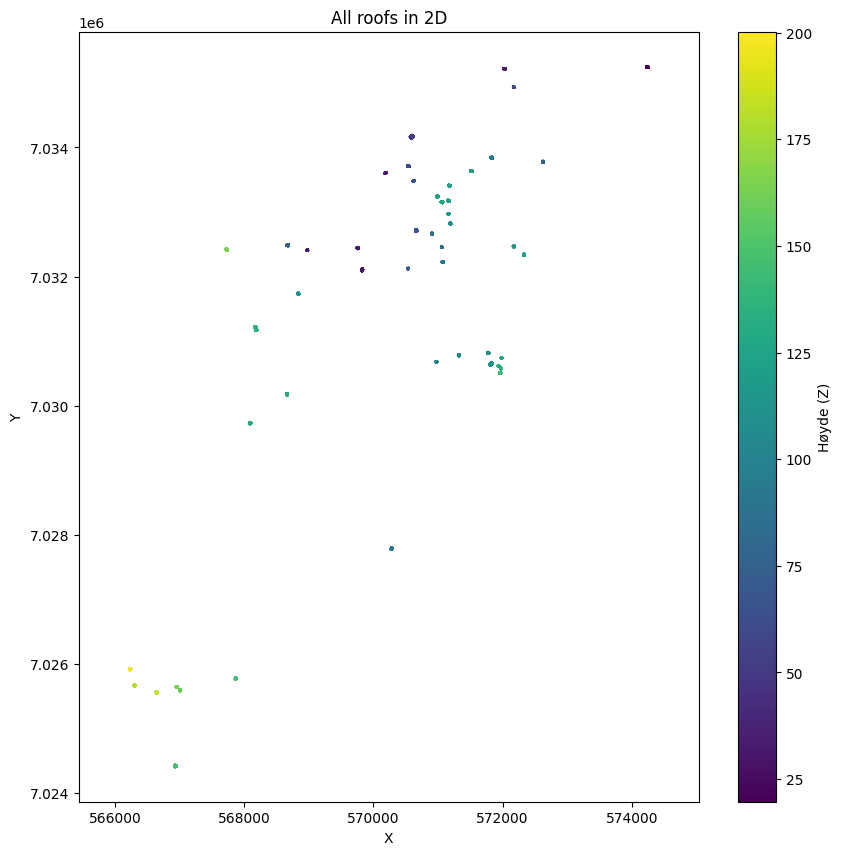

In [4]:
import os
import laspy as lp
import matplotlib.pyplot as plt

folder = "sample_roofdata_50"

# Opprett lister for å samle alle punktene
all_x = []
all_y = []
all_z = []

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og les punktene
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z
            
            # Legg punktene til samlelistene
            all_x.extend(x)
            all_y.extend(y)
            all_z.extend(z)

# Plot alle takene i 2D (ovenfra)
plt.figure(figsize=(10, 10))
scatter = plt.scatter(all_x, all_y, c=all_z, s=1, cmap='viridis')  # Farger basert på høyde (z)
plt.title("All roofs in 2D")
plt.xlabel("X")
plt.ylabel("Y")

# Legg til en fargeskala for høyden
cbar = plt.colorbar(scatter)
cbar.set_label("Høyde (Z)")

plt.axis('equal')  # Sikrer at aksene har samme skala
plt.show()

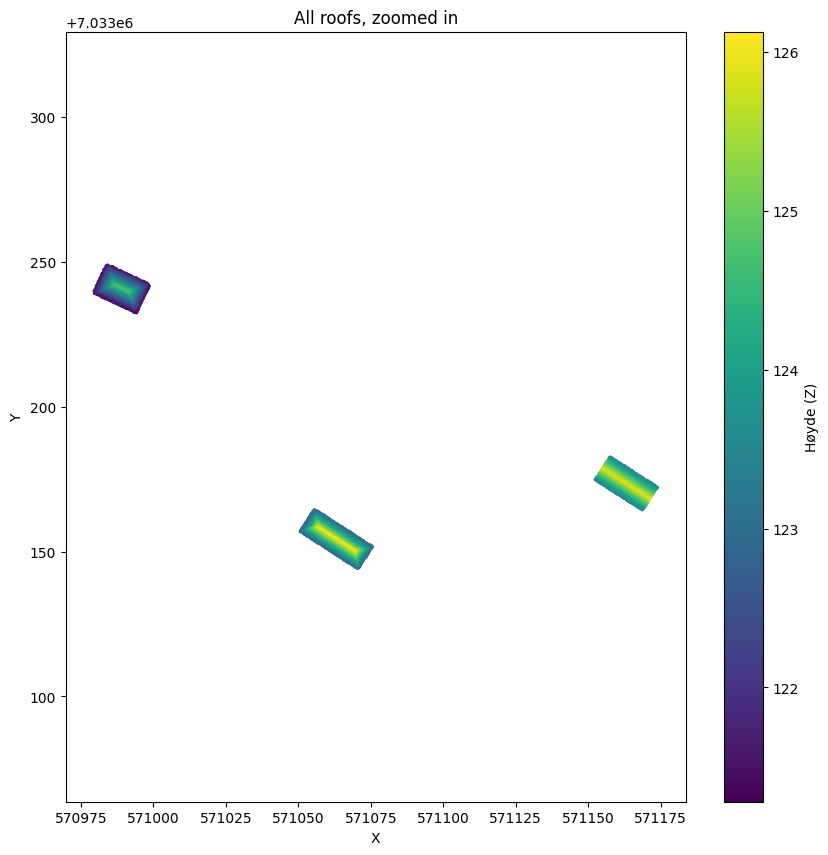

In [5]:
import os
import laspy as lp
import matplotlib.pyplot as plt

folder = "sample_roofdata_50"

# Opprett lister for å samle alle punktene
all_x = []
all_y = []
all_z = []

# Gå gjennom filene i mappen
for roof in os.listdir(folder):
    if roof.endswith(".laz"):
        # Lag hele filstien ved å kombinere mappen og filnavnet
        file_path = os.path.join(folder, roof)
        
        # Åpne .laz-filen og les punktene
        with lp.open(file_path, laz_backend=lp.LazBackend) as fh:
            las_data = fh.read()
            x = las_data.x
            y = las_data.y
            z = las_data.z
            
            # Legg punktene til samlelistene
            all_x.extend(x)
            all_y.extend(y)
            all_z.extend(z)

# Definer området du vil zoome inn på
x_min, x_max = 570000, 572000  # Juster disse verdiene for ditt område
y_min, y_max = 7.0330e6, 7.03335e6

# Filtrer punkter som faller innenfor området
zoom_x = [x for x, y in zip(all_x, all_y) if x_min <= x <= x_max and y_min <= y <= y_max]
zoom_y = [y for x, y in zip(all_x, all_y) if x_min <= x <= x_max and y_min <= y <= y_max]
zoom_z = [z for x, y, z in zip(all_x, all_y, all_z) if x_min <= x <= x_max and y_min <= y <= y_max]

# Plot punktene i zoom-området
plt.figure(figsize=(10, 10))
scatter = plt.scatter(zoom_x, zoom_y, c=zoom_z, s=1, cmap='viridis')  # Farger basert på høyde (z)
plt.title(f"All roofs, zoomed in")
plt.xlabel("X")
plt.ylabel("Y")

# Legg til en fargeskala for høyden
cbar = plt.colorbar(scatter)
cbar.set_label("Høyde (Z)")

plt.axis('equal')  # Sikrer at aksene har samme skala
plt.show()